In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [ ]:
car=pd.read_csv('quikr_car.csv')

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
# check null values
car.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

# Quality/Inconsistency in data
- Name col is pretty incosistent
-Name col have company names attached to it
- some names are spam like 'selling car Ta' or 'AC Heater'
- year col has many non-year values
- year is in object change to int
- price has so many non-price values
- price has commas in its prices asn is in obj
- kms written in object we need to fix that as well
- we have null values in kms_driven and fuel types


# Cleaning of Dataset

In [ ]:
# year has many non-year values

car=car[car['year'].str.isnumeric()]

In [ ]:
car.shape

(842, 6)

In [ ]:
# convert year object col into numeric data
car['year']=car['year'].astype(int)

<ipython-input-11-5dd8eba99cf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [ ]:
# Price has values 'Ask for Price'
car=car[car['Price']!='Ask For Price']

In [ ]:
# price has commas in its prices and It is obj as well
car['Price']=car['Price'].str.replace(',','').astype(int)

In [ ]:
# kms col has object values with , and kms at last
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [ ]:
car=car[car['kms_driven'].str.isnumeric()]

In [ ]:
car['kms_driven']=car['kms_driven'].astype(int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [ ]:
# Fuel Type has null value remove that
car=car[~car['fuel_type'].isna()]

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


- Name and Company cols had spammed data values but with the previous cleaning, those rows got removed.

- Company col looks clean does not need any more changes

In [ ]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car=car.reset_index(drop=True)

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
# cleaned Data
car.to_csv('Cleaned_Car_data.csv')

In [ ]:
# descriptive analytics for numerical data
car.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [ ]:
# descriptive analytics for object data
car.describe(include='O')

,name,company,fuel_type
count,815,815,815
unique,254,25,3
top,Maruti Suzuki Swift,Maruti,Petrol
freq,51,221,428


In [ ]:
car=car[car['Price']<6000000]

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [ ]:
# Checking relationship of company with Price
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [ ]:
import seaborn as sns

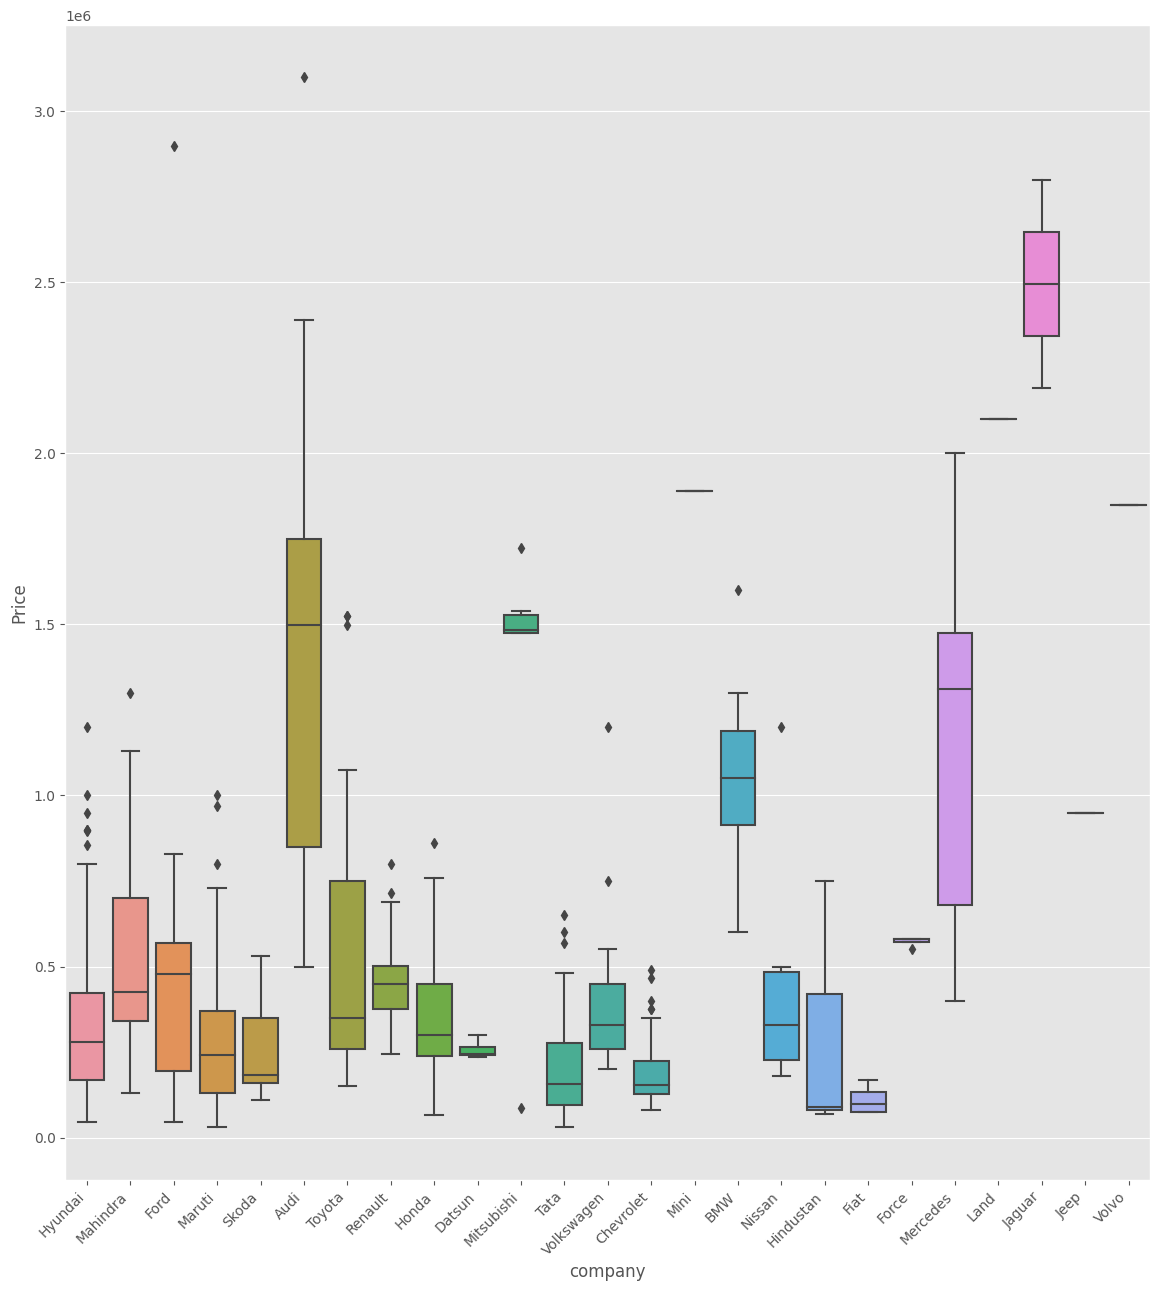

In [ ]:
plt.subplots(figsize=(14,15))
ax=sns.boxplot(x='company', y='Price', data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

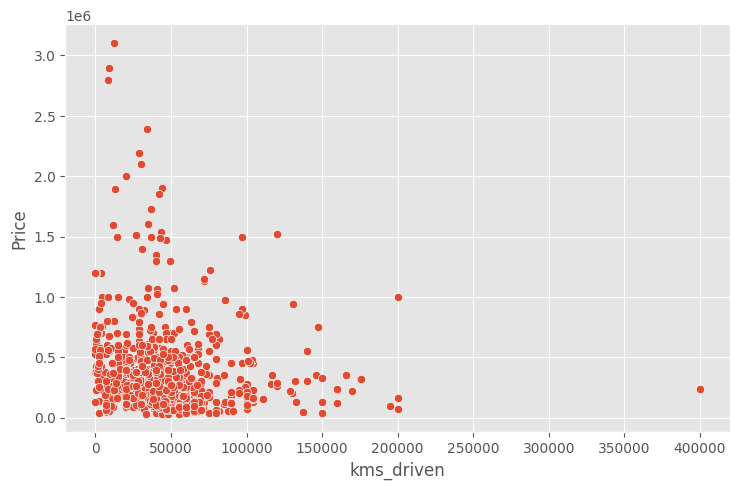

In [ ]:
# Checkinng relationship of kms_driven with price
sns.relplot(x='kms_driven', y='Price',data=car, height=5, aspect=1.5)

In [ ]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

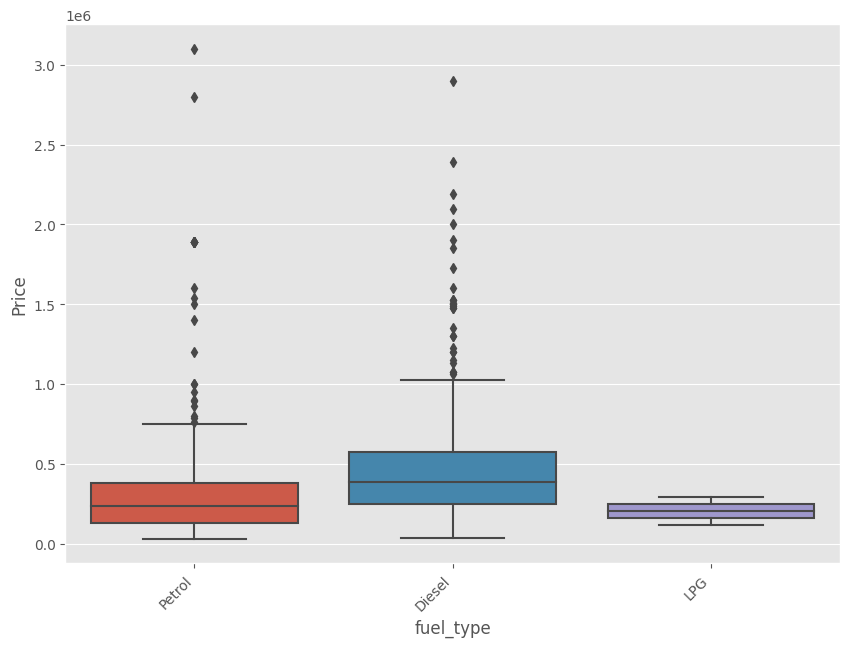

In [ ]:
plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='fuel_type', y='Price', data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

In [ ]:
# split the data into two parts Independent and dependent
X=car.drop ('Price', axis=1) # Independent variables

In [ ]:
y=car['Price'] # dependent variables

In [ ]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [98]:
'''Creating an OneHotEncoder object to contain
all the possible categories'''
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

# Creating a column transformer to transform categorical columns

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler=StandardScaler()

In [ ]:
lr=LinearRegression()

In [ ]:
# Applying Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
pipe=make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [99]:
y_pred=pipe.predict(X_test)

In [100]:
r2_score(y_pred, y_test)

0.6681583162358663

In [101]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [102]:
np.argmax(scores)

433

In [103]:
scores[np.argmax(scores)]

0.8456515104452564

In [104]:
import pickle

In [105]:
pickle.dump(pipe, open('Lin_Reg.pkl', 'wb'))